In [48]:
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt

In [49]:
data = fetch_california_housing()

In [50]:
data.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]], shape=(20640, 8))

In [51]:
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

In [52]:
x,y = data.data,data.target

In [53]:
from sklearn.neighbors import KNeighborsRegressor

In [54]:
mod = KNeighborsRegressor()

In [55]:
mod.fit(x,y)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [56]:
pred = mod.predict(x)

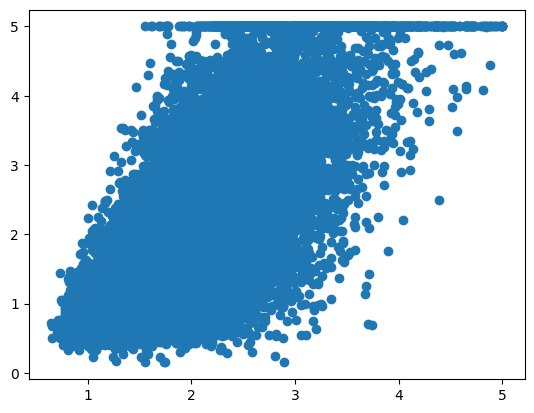

In [57]:
plt.scatter(pred,y)

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
modl = LinearRegression()

In [60]:
modl.fit(x,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [61]:
pred = modl.predict(x)
pred

array([4.13164983, 3.97660644, 3.67657094, ..., 0.17125141, 0.31910524,
       0.51580363], shape=(20640,))

In [62]:
import matplotlib.pyplot as plt


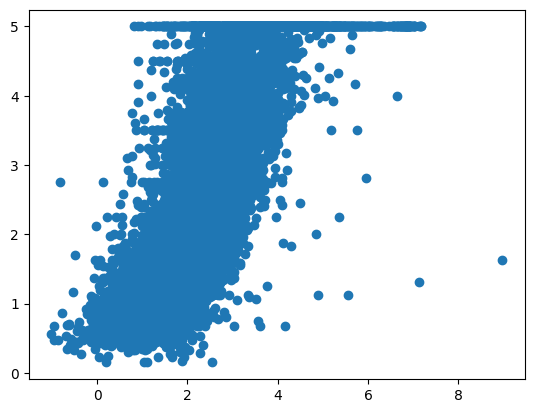

In [63]:
plt.scatter(pred,y)

In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [65]:
pipe = Pipeline([
    ("scale",StandardScaler()),
    ("modle",KNeighborsRegressor(n_neighbors=1))
])

In [66]:
pipe.fit(x,y)

,steps,"[('scale', ...), ('modle', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_neighbors,1
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30


In [67]:
pred = pipe.predict(x)

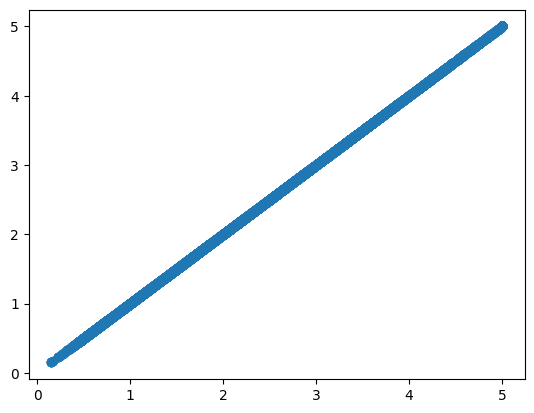

In [68]:
plt.scatter(pred,y)

In [69]:
from sklearn.model_selection import GridSearchCV

In [70]:
pipe.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()),
  ('modle', KNeighborsRegressor(n_neighbors=1))],
 'transform_input': None,
 'verbose': False,
 'scale': StandardScaler(),
 'modle': KNeighborsRegressor(n_neighbors=1),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'modle__algorithm': 'auto',
 'modle__leaf_size': 30,
 'modle__metric': 'minkowski',
 'modle__metric_params': None,
 'modle__n_jobs': None,
 'modle__n_neighbors': 1,
 'modle__p': 2,
 'modle__weights': 'uniform'}

In [71]:
mod = GridSearchCV(estimator=pipe,
             param_grid={'modle__n_neighbors':[1,2,3,4,5,6,7,8,9,10]},
             cv=3
             )

In [72]:
import pandas as pd

In [73]:
mod.fit(x,y)
pd.DataFrame(mod.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_modle__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.010541,0.001043,0.189428,0.012557,1,{'modle__n_neighbors': 1},0.324068,0.334830,0.323371,0.327423,0.005245,10
1,0.010155,0.000433,0.212970,0.017158,2,{'modle__n_neighbors': 2},0.468788,0.503457,0.424388,0.465544,0.032361,9
2,0.009876,0.000117,0.228436,0.015401,3,{'modle__n_neighbors': 3},0.518547,0.543340,0.473595,0.511827,0.028867,8
3,0.009942,0.000242,0.239788,0.016872,4,{'modle__n_neighbors': 4},0.540323,0.564974,0.499827,0.535041,0.026857,7
4,0.009852,0.000055,0.251482,0.016883,5,{'modle__n_neighbors': 5},0.551149,0.579313,0.511781,0.547414,0.027696,6
5,0.009921,0.000135,0.261192,0.017828,6,{'modle__n_neighbors': 6},0.558435,0.586185,0.521134,0.555251,0.026652,5
6,0.009905,0.000151,0.268461,0.018000,7,{'modle__n_neighbors': 7},0.564207,0.590509,0.525223,0.559979,0.026820,4
7,0.009944,0.000146,0.276767,0.019068,8,{'modle__n_neighbors': 8},0.568637,0.593942,0.529337,0.563972,0.026580,3
8,0.009734,0.000049,0.280969,0.019666,9,{'modle__n_neighbors': 9},0.571972,0.594863,0.529928,0.565588,0.026891,2
9,0.010144,0.000264,0.292076,0.020414,10,{'modle__n_neighbors': 10},0.573760,0.595831,0.532973,0.567522,0.026038,1


In [74]:
print(fetch_california_housing()['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

# scikit learn preprocessing

In [75]:
df = pd.read_csv('drawndata1.csv')

In [76]:
df.head(3)

,x,y,z
0,58.080365,225.699042,a
1,238.867357,247.456645,a
2,156.218212,286.588782,a


In [77]:
x = df[['x','y']].values 
y = df['z']=='a'

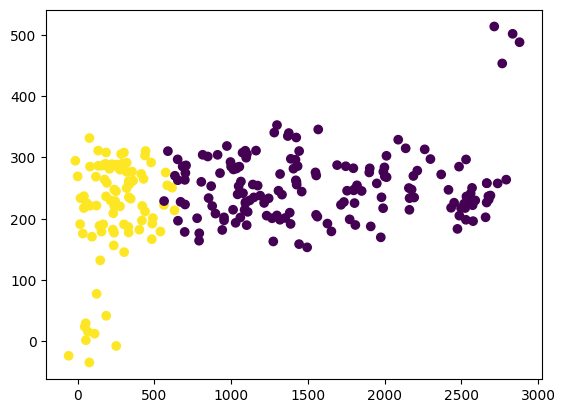

In [78]:
plt.scatter(x[:,0],x[:,1],c=y)

The line `plt.scatter(x[:, 0], x[:, 1], c=y)` is a common way to create a scatter plot in Python using **Matplotlib**, especially when visualizing data in machine learning or data science.

Let me break it down for you:

---

### 🔍 **What It Means**

```python
plt.scatter(x[:, 0], x[:, 1], c=y)
```

* `plt.scatter(...)`: This is a **scatter plot** function from Matplotlib (specifically `matplotlib.pyplot`), which is used to plot points on a 2D plane.

* `x[:, 0]`: This means **"take all rows, and column 0"** from array `x`. In other words, this is the **x-axis** data (horizontal).

* `x[:, 1]`: Similarly, this is the **y-axis** data (vertical).

* `c=y`: This sets the **color** of each point according to the value of `y`.
  Typically, `y` would be a label or cluster ID for each point — for example, in classification or clustering problems.

---

### 🧠 Example

Let's say you have a dataset like this:

```python
x = np.array([[1, 2],
              [3, 4],
              [5, 1],
              [2, 3]])

y = np.array([0, 1, 0, 1])
```

Then:

```python
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.show()
```

Will plot the 4 points and color them based on the values in `y`:

* Points with `y = 0` will be one color (say blue)
* Points with `y = 1` will be another color (say orange)

---

### ✅ Summary

| Component       | Meaning                              |
| --------------- | ------------------------------------ |
| `x[:, 0]`       | x-coordinates (1st feature)          |
| `x[:, 1]`       | y-coordinates (2nd feature)          |
| `c=y`           | color each point by its label in `y` |
| `plt.scatter()` | draw the scatter plot                |

Let me know if you want a visual example or code to run it.


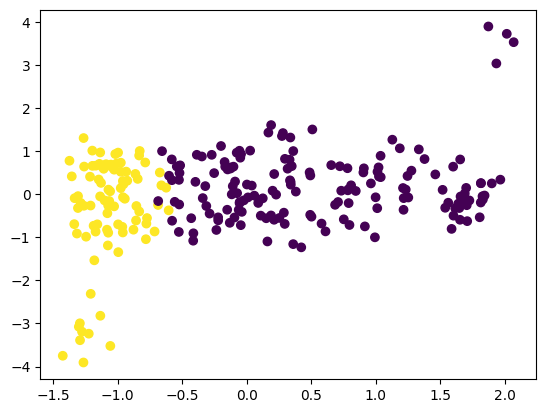

In [79]:
from sklearn.preprocessing import StandardScaler
x_new = StandardScaler().fit_transform(x)
plt.scatter(x_new[:,0],x_new[:,1],c=y)

In [80]:
import numpy as np

In [81]:
# x = np.random.exponential(10, 1000) + np.random.normal(0, 1, 1000)
# plt.hist((x - np.mean(x)) / np.std(x),bins=30)

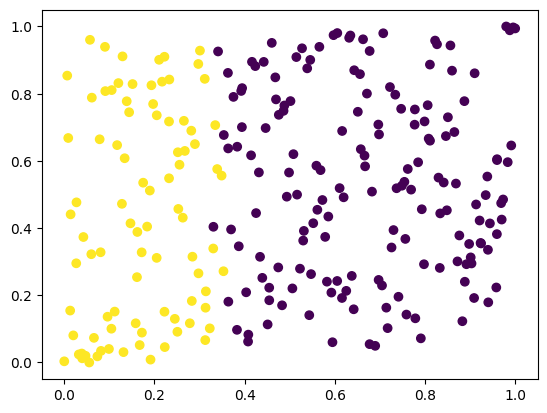

In [83]:
from sklearn.preprocessing import StandardScaler,QuantileTransformer
x_new = QuantileTransformer(n_quantiles=100).fit_transform(x)
plt.scatter(x_new[:,0],x_new[:,1],c=y)

In [86]:
# Step 1: Simulate 2D data
def generate_data():
    np.random.seed(0)
    x1 = np.random.exponential(10, 1000)
    x2 = np.random.normal(0, 1, 1000)
    X = np.column_stack((x1, x2))
    return X

In [87]:
# Step 2: Define plot_out function
def plot_out(scaler):
    X = generate_data()
    X_scaled = scaler.fit_transform(X)

    plt.figure(figsize=(6, 5))
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], alpha=0.5, edgecolor='k')
    plt.title(f"{scaler.__class__.__name__}")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.grid(True)
    plt.show()

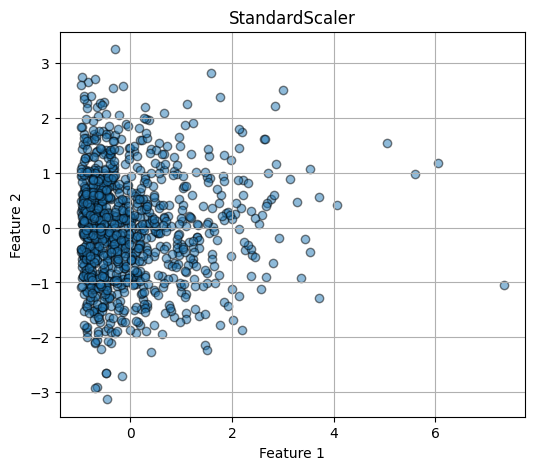

In [89]:
plot_out(scaler = StandardScaler())


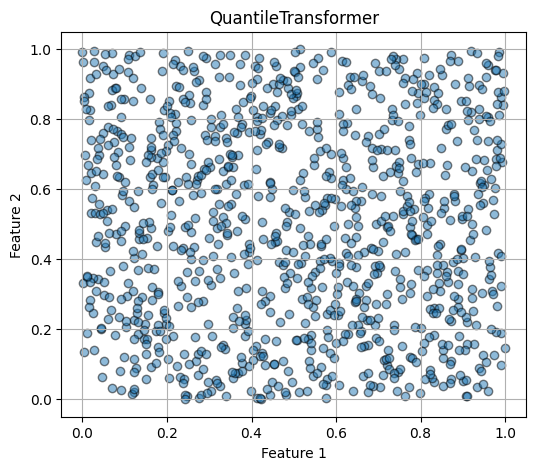

In [90]:
plot_out(scaler=QuantileTransformer(n_quantiles=100))

In [92]:
df = pd.read_csv('drawndata2.csv')
df.head()

,x,y,z
0,469.759355,453.574946,a
1,535.331819,435.221848,a
2,504.285526,437.767578,a
3,469.891398,368.371652,a
4,405.425622,403.141546,a


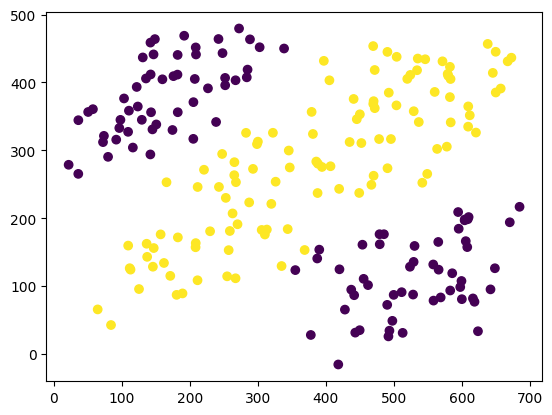

In [93]:

x=df[['x','y']].values
y=df['z']=='a'
plt.scatter(x[:,0],x[:,1],c=y)

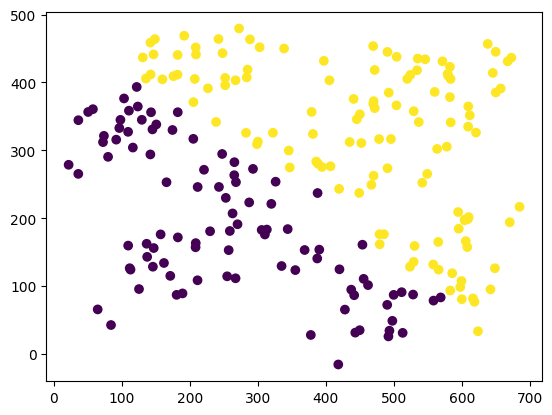

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

pipe = Pipeline([
    ('scale',QuantileTransformer(n_quantiles=100)),
    ('model',LogisticRegression())
])

pred= pipe.fit(x,y).predict(x)
plt.scatter(x[:,0],x[:,1],c=pred)

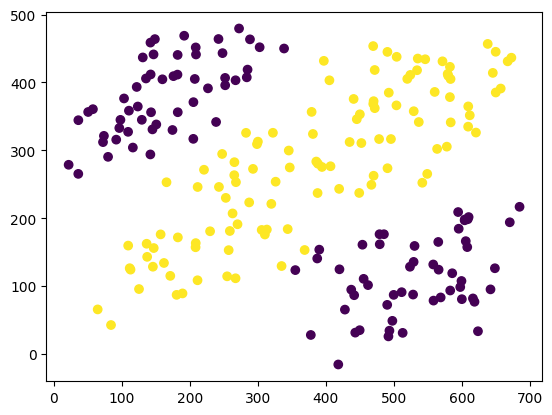

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

pipe = Pipeline([
    ('scale',PolynomialFeatures()),
    ('model',LogisticRegression())
])

pred= pipe.fit(x,y).predict(x)
plt.scatter(x[:,0],x[:,1],c=pred)

# preprocessing in categorical data

In [98]:
arr=np.array(['low','low','high','medium']).reshape(-1,1)
arr

array([['low'],
       ['low'],
       ['high'],
       ['medium']], dtype='<U6')

In [99]:
from sklearn.preprocessing import OneHotEncoder

In [107]:
enc = OneHotEncoder(sparse_output=False,handle_unknown='ignore')
enc.fit_transform(arr)

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [109]:
enc.transform([['zero']])

array([[0., 0., 0.]])

# credit cart fraud detection

dataset url: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud


In [111]:
df = pd.read_csv('/home/atiar/Downloads/creditcard.csv')
df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [114]:
x = df.drop(columns=['Time','Amount','Class']).values
y = df['Class'].values
f"Shapes of x={x.shape} and y={y.shape} # Fraud cases={y.sum()}"

'Shapes of x=(284807, 28) and y=(284807,) # Fraud cases=492'

In [123]:
from sklearn.linear_model import LogisticRegression
mod = LogisticRegression(class_weight={0:1,1:2},max_iter=1000)
mod.fit(x,y).predict(x).sum()

np.int64(434)

In [119]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000),
    param_grid={'class_weight':[{0:1,1:v} for v in range(1,4)]},
    cv=4,
    n_jobs=1
)

grid.fit(x,y)

,estimator,LogisticRegre...max_iter=1000)
,param_grid,"{'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2}, ...]}"
,scoring,None
,n_jobs,1
,refit,True
,cv,4
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [120]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.717436,0.137138,0.008784,0.001699,"{0: 1, 1: 1}","{'class_weight': {0: 1, 1: 1}}",0.999228,0.998890,0.999228,0.998919,0.999066,0.000162,3
1,0.652826,0.090140,0.010943,0.002832,"{0: 1, 1: 2}","{'class_weight': {0: 1, 1: 2}}",0.999270,0.999157,0.999171,0.999031,0.999157,0.000085,2
2,0.735223,0.191906,0.011472,0.002586,"{0: 1, 1: 3}","{'class_weight': {0: 1, 1: 3}}",0.999199,0.999256,0.999199,0.999115,0.999192,0.000050,1


In [124]:
from sklearn.metrics import precision_score,recall_score

precision_score(y,grid.predict(x))

0.8177874186550976

In [125]:
recall_score(y,grid.predict(x))

0.766260162601626

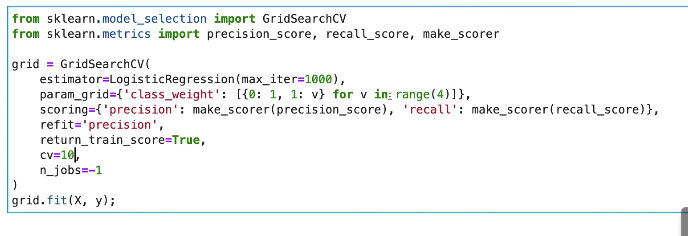

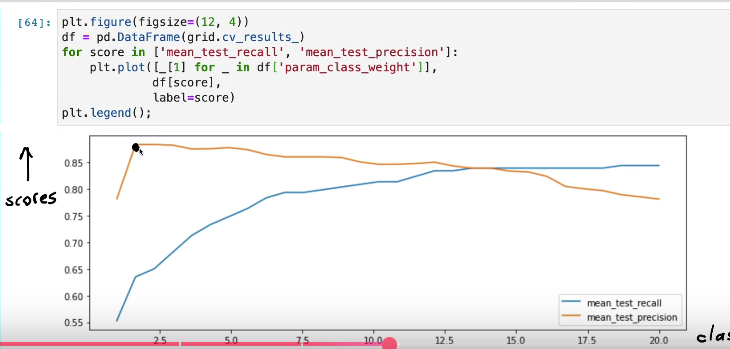